# Linear Regression Algorithm in Scratch

In [133]:
#Linear Regression Algorithm

import numpy as np

class LinearRegression:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (2/n_samples)*np.dot(X.T, (y_predicted-y))
            db = (2/n_samples)*np.sum(y_predicted-y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

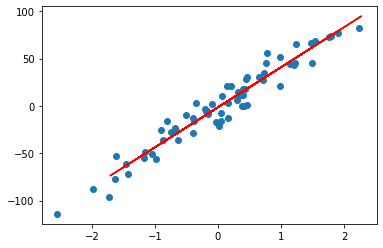

111.27693510522239


In [141]:
# test

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.close("all")

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regression = LinearRegression()
regression.fit(X_train, y_train)
predicted = regression.predict(X_test)

#visualize
plt.scatter(X_train, y_train)
plt.plot(X_test, predicted, "r-")
plt.show()

#mean squared error
def mse(y_test, y_predicted):
    return np.mean((y_test-y_predicted)**2)
mse_value = mse(y_test, predicted)
print(mse_value)

# Linear Regression using Scikit-Learn

In [1]:
# Sklearn use Ordinary Least Squares Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regress = LinearRegression()
regress.fit(X_train, y_train)
predicted = regress.predict(X_test)
mse = mean_squared_error(y_test, predicted)
print(mse)

111.2769351745067


# Feedback

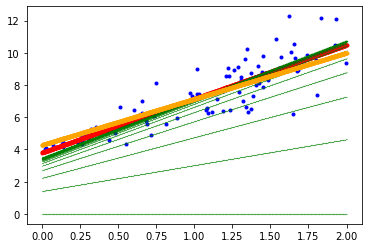

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.close("all")

df = pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/testData_LinearRegression.txt", sep="\s+")

xxRaw = np.array(df["xx"])
yyRaw = np.array(df["yy"])

plt.plot(xxRaw,yyRaw,"b.") # data

# Maximize MLE
# using Normal Equation
Ndata = len(xxRaw)
X = np.c_[np.ones((Ndata,1)), xxRaw]
y = yyRaw.reshape([Ndata,1])

wOLS = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
x_sample = np.linspace(0,2,1000)
x_sample_bias = np.c_[np.ones([1000,1]),x_sample]
y_predict = wOLS.T.dot(x_sample_bias.T)
x_sample_row = x_sample.reshape(1,1000)
plt.plot(x_sample_row, y_predict, color="red", marker='o', markersize=3, label="MLE")

# using Gradient Descent Method
eta = 0.1 # learning rate
Niteration = 20
wGD = np.zeros([2,1])
for iteration in np.arange(Niteration):
    y_predict_GD = wGD.T.dot(x_sample_bias.T)
    plt.plot(x_sample_row,y_predict_GD,color='green', marker='o', markersize=0.1)
    gradients = -(2/Ndata)*(X.T.dot(y.reshape((Ndata,1))-X.dot(wGD))) #convexity already guaranteed
    wGD = wGD - eta * gradients


# MAP(include prior)
x_map = xxRaw.reshape(100,1)
y_map = yyRaw
weights = np.zeros(1)
bias = 2
learning_rate = 0.001
# gradient descent for weights and bias
for _ in range(20):
    predicted = np.dot(x_map, weights) + bias
    dw = np.dot(x_map.T, (predicted-y_map)) + 2*weights # assume gamma(regularization parameter) equals one
    db = np.sum(predicted-y_map)
    weights -= learning_rate*dw
    bias -= learning_rate*db

y_rp = np.dot(x_sample_row.reshape(1000,1), weights) + bias
plt.plot(x_sample_row.reshape(1000,1), y_rp, color='orange', marker='o', markersize=3, label="MAP")
plt.show()